# Laboratorio 02: Representación Numérica, Errores y Estabilidad.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Laura Sofía Sierra Sánchez
*Métodos computacionales 2025-I*

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 1.
Cree una función llamada `myint` pero que a partir de un número binario con base de 16 bits encuentre el entero correspondiente. Compare su resultado con `int(0b1000011100001)`

In [3]:
def myint(bin_str):
    '''
    Convierte un número binario de 16 bits a su entero correspondiente.
    
    Parámetros:
    - bin_str : cadena binaria de 16 bits
        
    Retorna:
    - valor : valor entero correspondiente
    '''
    # Asegurar que la cadena tenga 16 bits
    if len(bin_str) != 16:
        raise ValueError("La cadena binaria debe tener exactamente 16 bits")
    
    # Convertir cada bit a entero y calcular el valor decimal
    valor = 0
    for i, bit in enumerate(bin_str):
        # Verificar que sea un bit válido
        if bit not in ('0', '1'):
            raise ValueError("La cadena debe contener solo 0s y 1s")
        
        # Calcular el valor del bit (2^(15-i))
        valor += int(bit) * (2 ** (15 - i))
    
    return valor

# Ejemplo de uso y comparación
numero_binario = '1000011100001'  # 13 bits
numero_binario_16bits = numero_binario.zfill(16)  # Convertir a 16 bits rellenando con ceros

# Usar la función
resultado_myint = myint(numero_binario_16bits)

# Usando la función int de Python
resultado_int = int('0b' + numero_binario, 2)


print(f"Resultado con la función myint (16 bits): {resultado_myint}")
print(f"Resultado con int() (13 bits): {resultado_int}")

Resultado con la función myint (16 bits): 4321
Resultado con int() (13 bits): 4321


# 2.
Generar una función llamada `number64` para flotantes de precisión doble (64bits) donde a partir de un número binario encuentre el valor real. Compruebe su solución usando

```
number64("0100000000111011100100001111111111111111111111111111111111111111")
```

In [4]:
def number64(bits):
    '''
    Convierte una cadena binaria de 64 bits (en formato IEEE 754) a un número flotante de precisión doble
    
    Parámetros:
    - bits : cadena binaria de exactamente 64 bits
        
    Retorna:
    - valor flotante correspondiente
    '''
    if len(bits) != 64:
        raise ValueError("El número debe tener exactamente 64 bits")

    # Separar el bit de signo, el exponente y la fracción
    s = int(bits[0], 2)
    e = int(bits[1:12], 2)
    f_bits = bits[12:]

    # Calcular la mantisa
    f = 0
    for i, bit in enumerate(f_bits):
        f += int(bit) * 2**(-(i + 1))

    # Comprobar casos especiales
    if e == 0 and f == 0:
        return 0.0 * (-1)**s  # +0 o -0
    elif e == 0:
        # Subnormal
        value = (-1)**s * f * 2**(-1022)
    elif e == 2047:
        if f == 0:
            return float('inf') if s == 0 else float('-inf')
        else:
            return float('nan')
    else:
        # Normalizado
        value = (-1)**s * (1 + f) * 2**(e - 1023)

    return value
    
binario = "0100000000111011100100001111111111111111111111111111111111111111"
resultado = number64(binario)

print("Resultado:", resultado)

Resultado: 27.566406249999996


# 3. Aproximación de $\pi$

La serie de Maclaurin para la función tangente inversa converge en $-1 < x \leq 1$ y está dada por:

$$
\arctan x = \lim_{n \to \infty} P_n(x) = \lim_{n \to \infty} \sum_{i=1}^n (-1)^{i+1} \frac{x^{2i-1}}{2i-1}
$$

- **Aproximación básica**
    - Utilizando el hecho de que $\tan(\pi/4) = 1$, implemente en Python una función que calcule $4P_n(1)$ y determina el número mínimo de términos $n$ necesarios para que $|4P_n(1) - \pi| < 10^{-3}$. Compare su resultado con el valor de $\pi$ de la librería math.
    - Requiriendo que el valor de $\pi$ esté dentro de un error de $10^{-4}$. ¿Cuántos términos de la serie se necesitaría sumar para obtener esta precisión? Implemente una solución en Python para encontrar este valor.
- **Mejora de la convergencia**
    El método anterior puede mejorarse significativamente usando la identidad:
    $$
    \frac{\pi}{4} = \arctan\left(\frac{1}{2}\right) + \arctan\left(\frac{1}{3}\right)
    $$
    - Implemente en Python una función que evalúe la serie para $\arctan(1/2)$ y $\arctan(1/3)$ por separado y luego las sume. Determine el número mínimo de términos necesarios para cada serie (pueden ser diferentes) para aproximar $\pi$ con un error menor a $10^{-3}$ y $10^{-6}$.

- **Método de alta precisión**
    Para obtener una convergencia aún más rápida, usamos la identidad:
    $$
    \frac{\pi}{4} = 4\arctan\left(\frac{1}{5}\right) - \arctan\left(\frac{1}{239}\right)
    $$
    Desarrolle un programa en Python que implemente esta fórmula y determine:
    - El número mínimo de términos necesarios en cada serie para aproximar $\pi$ con error menor a $10^{-3}$ y $10^{-6}$.
    - Compare el rendimiento (número de términos requeridos) con los métodos anteriores.
 
 

In [5]:
def arctan_series(x, tol=1e-6):
    '''
    Calcula arctan(x) usando su serie de Maclaurin hasta que el error sea menor que 'tol'
    Parámetros:
    - x : valor de entrada para calcular arctan(x)
    - tol : tolerancia para el criterio de parada
    Retorna:
    - arctan : valor aproximado de arctan (x)
    - número de términos utilizados
    '''
    term = x # Primer término de la serie 
    arctan = 0
    i = 1 # Contador de términos
    while abs(term) > tol: # Si arctan(x) es mayor a la tolerancia
        term = ((-1) ** (i + 1)) * (x ** (2 * i - 1)) / (2 * i - 1)
        arctan += term
        i += 1
    return arctan, i - 1

def pi_basic(tol):
    '''
    Aproximación básica de pi con arctan(1) = pi/4
    Parámetros:
    - tol : tolerancia para el error absoluto
    Retorna:
    - aproximación de pi
    - número de términos usados
    '''
    term = 1
    s = 0
    i = 1
    while abs(4 * s - math.pi) > tol: # Error absoluto 
        term = ((-1) ** (i + 1)) / (2 * i - 1)
        s += term
        i += 1
    return 4 * s, i - 1

def pi_better(tol):
    '''
    Aproximación mejorada de pi usando arctan(1/2) + arctan(1/3)
    Parámetros:
    - tol : tolerancia para el error absoluto
    Retorna:
    - aproximación de pi
    - n1 : número de términos usados para arctan(1/2)
    - n2 : número de términos usados para arctan(1/3)
    '''
    pi_4 = 0
    i = 1
    term1 = term2 = 1
    s1 = s2 = 0 # Sumas
    n1 = n2 = 0 # Contadores de términos

    while abs(4 * (s1 + s2) - math.pi) > tol: # Error absoluto
        if abs(term1) > tol: # Si arctan(1/2) es mayor a la tolerancia
            term1 = ((-1) ** (i + 1)) * (1 / 2) ** (2 * i - 1) / (2 * i - 1)
            s1 += term1
            n1 += 1
        if abs(term2) > tol: # Si arctan(1/3) es mayor a la tolerancia
            term2 = ((-1) ** (i + 1)) * (1 / 3) ** (2 * i - 1) / (2 * i - 1)
            s2 += term2
            n2 += 1
        i += 1

    return 4 * (s1 + s2), n1, n2

def pi_machin(tol):
    '''
    Aproximación de pi usando la identidad de Machin: pi/4 = 4 arctan(1/5) - arctan(1/239)
    Parámetros:
    - tol : tolerancia
    Retorna:
    - aproximación de pi
    - n1 : términos usados en arctan(1/5)
    - n2 : términos usados en arctan(1/239)
    '''
    term1 = term2 = 1
    s1 = s2 = 0
    i = 1
    n1 = n2 = 0

    while abs(4 * (4 * s1 - s2) - math.pi) > tol: # Error absoluto
        if abs(term1) > tol: # Si arctan(1/5) es mayor a la tolerancia
            term1 = ((-1) ** (i + 1)) * (1 / 5) ** (2 * i - 1) / (2 * i - 1)
            s1 += term1
            n1 += 1
        if abs(term2) > tol: # Si arctan(1/239) es mayor a la tolerancia
            term2 = ((-1) ** (i + 1)) * (1 / 239) ** (2 * i - 1) / (2 * i - 1)
            s2 += term2
            n2 += 1
        i += 1

    return 4 * (4 * s1 - s2), n1, n2


# Resultados
for eps in [1e-3, 1e-6]:
    print(f"\nAproximación con tolerancia {eps}")
    
    pi_aprox1, n1 = pi_basic(eps)
    print(f"Método básico: pi aprox {pi_aprox1}, términos: {n1}")
    
    pi_aprox2, n2_1, n2_2 = pi_better(eps)
    print(f"Método mejorado: pi aprox {pi_aprox2}, términos: arctan(1/2): {n2_1}, arctan(1/3): {n2_2}")
    
    pi_aprox3, n3_1, n3_2 = pi_machin(eps)
    print(f"Método de Machin: pi aprox {pi_aprox3}, términos: arctan(1/5): {n3_1}, arctan(1/239): {n3_2}")



Aproximación con tolerancia 0.001
Método básico: pi aprox 3.140592653839794, términos: 1000
Método mejorado: pi aprox 3.141111845972957, términos: arctan(1/2): 4, arctan(1/3): 3
Método de Machin: pi aprox 3.1405970293260603, términos: arctan(1/5): 2, arctan(1/239): 2

Aproximación con tolerancia 1e-06
Método básico: pi aprox 3.1415936535887745, términos: 1000001
Método mejorado: pi aprox 3.1415928051045654, términos: arctan(1/2): 9, arctan(1/3): 6
Método de Machin: pi aprox 3.141591772183203, términos: arctan(1/5): 4, arctan(1/239): 2


# 4. Serie Exponencial
Considere la serie para $e^{-x}$

$$
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
$$

- Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

$$
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
$$

- Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

- Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


- Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, use el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


- Realice una serie de gráficos del error versus $N$ para diferentes valores de $x$.

Análisis para x <= 1

Para x = 0.1:
N óptimo: 4
Aproximación: 0.9048375000000001
Valor exacto: 0.9048374180359595
Error absoluto: 8.196404055471618e-08
Error relativo: 9.05842739490453e-08

Para x = 0.325:
N óptimo: 7
Aproximación: 0.7225273506629617
Valor exacto: 0.7225273536420722
Error absoluto: 2.979110513834371e-09
Error relativo: 4.123180248910233e-09

Para x = 0.55:
N óptimo: 8
Aproximación: 0.5769498224069949
Valor exacto: 0.5769498103804866
Error absoluto: 1.2026508233731192e-08
Error relativo: 2.0844981690521666e-08

Para x = 0.775:
N óptimo: 9
Aproximación: 0.4607037608836971
Valor exacto: 0.4607037809989658
Error absoluto: 2.0115268728471136e-08
Error relativo: 4.366204393819874e-08

Para x = 1.0:
N óptimo: 10
Aproximación: 0.3678794642857144
Valor exacto: 0.36787944117144233
Error absoluto: 2.3114272051927287e-08
Error relativo: 6.283110569681271e-08

Análisis para 1 < x <= 10

Para x = 1.0:
N óptimo: 10
Aproximación: 0.3678794642857144
Valor exacto: 0.36787944117144233
Er

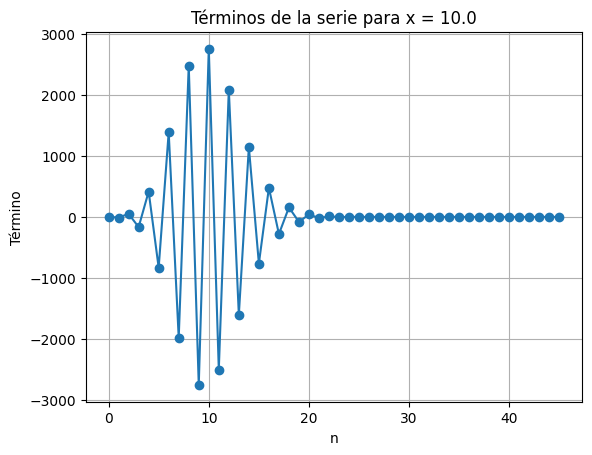


Cancelación alrededor de n aprox 9:
n=7: -1984.126984126984
n=8: 2480.15873015873
n=9: -2755.731922398589
n=10: 2755.731922398589
n=11: -2505.210838544172

Análisis para x > 10

Para x = 10.0:
N óptimo: 45
Aproximación: 4.5399927936094e-05
Valor exacto: 4.5399929762484854e-05
Error absoluto: 1.826390851977864e-12
Error relativo: 4.0228935629038316e-08


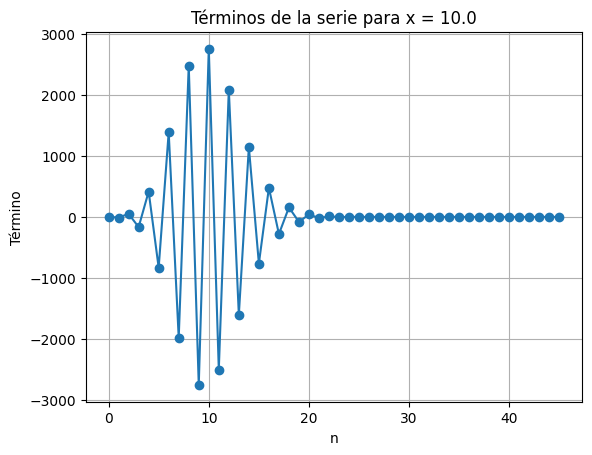


Cancelación alrededor de n aprox 9:
n=7: -1984.126984126984
n=8: 2480.15873015873
n=9: -2755.731922398589
n=10: 2755.731922398589
n=11: -2505.210838544172

Para x = 32.5:
N óptimo: 100
Aproximación: -0.00013519326369765231
Valor exacto: 7.681204685202095e-15
Error absoluto: 0.0001351932637053335
Error relativo: 17600528725.107983

Para x = 55.0:
N óptimo: 100
Aproximación: 4116083089058638.0
Valor exacto: 1.2995814250075031e-24
Error absoluto: 4116083089058638.0
Error relativo: 3.1672375503788645e+39

Para x = 77.5:
N óptimo: 100
Aproximación: 3.970881420752299e+30
Valor exacto: 2.1987591132394053e-34
Error absoluto: 3.970881420752299e+30
Error relativo: 1.8059647356740445e+64

Para x = 100.0:
N óptimo: 100
Aproximación: 5.344124163786119e+41
Valor exacto: 3.720075976020836e-44
Error absoluto: 5.344124163786119e+41
Error relativo: 1.4365631772667286e+85


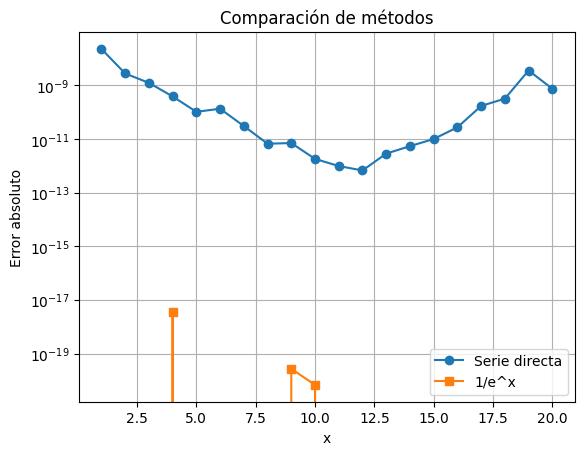

In [8]:
def exponential_series(x, N):
  '''
  Calcula e^(-x) usando la serie de Taylor hasta el término N
  Parámetros:
  - x : valor de entrada para la exponencial
  - N : número de términos de la serie
  Retorna:
  - resultado : valor aproximado de e^(-x)
  - terms : lista de todos los términos calculados
  '''
  resultado = 0
  terms = []
  for n in range(N+1):
    term = (-1)**n * (x**n) / math.factorial(n) # Calcular cada término de la serie
    resultado += term
    terms.append(term)
  return resultado, terms

def optimoN(x, tol=1e-7, max_iter=100):
  '''
  Encuentra el N donde el siguiente término es <= tol * suma acumulada
  Parámetros:
  - x : valor de entrada para la exponencial
  - tol : tolerancia para el criterio de parada
  - max_iter : número máximo de iteraciones
  Retorna:
  - número óptimo de términos según el criterio dado
  '''
  sum = 0
  for n in range(max_iter):
    term = (-1)**n * (x**n) / math.factorial(n)
    if n > 0 and abs(term) <= tol * abs(sum): # Criterio de parada
        return n-1 # Devuelve el N anterior
    sum += term
  return 100 # Si no se alcanza el criterio de 100 iteraciones

def analizar_series(x_valores):
  '''
  Analiza la serie para diferentes valores de x, mostrando resultados y graficas
  Parámetros:
  - x_valores : lista de valores de x para anlizar
  '''
  for x in x_valores:
    # Encontrar N óptimo para x
    N_opt = optimoN(x)

    # Calcular aprximación y términos
    approx, terms = exponential_series(x, N_opt)
    exact = np.exp(-x)
    # Calcular errores
    error = abs(approx - exact)
    error_rel = error / exact if exact != 0 else error

    # Mostrar resultados
    print(f"\nPara x = {x}:")
    print(f"N óptimo: {N_opt}")
    print(f"Aproximación: {approx}")
    print(f"Valor exacto: {exact}")
    print(f"Error absoluto: {error}")
    print(f"Error relativo: {error_rel}")

    # Gráfico de términos para x aprox 10
    if 9.5 <= x <= 10.5:
      plt.figure()
      plt.plot(range(N_opt+1), terms, 'o-')
      plt.title(f'Términos de la serie para x = {x}')
      plt.xlabel('n')
      plt.ylabel('Término')
      plt.grid()
      plt.show()

      # Mostrar cancelación alrededor de n aprox x-1
      n_cancel = int(round(x-1))
      print(f"\nCancelación alrededor de n aprox {n_cancel}:")
      for n in range(max(0, n_cancel-2), min(N_opt, n_cancel+3)):
          print(f"n={n}: {terms[n]}")

# Análisis para diferentes valores de x
x_valores1 = np.linspace(0.1, 1, 5)
x_valores2 = np.linspace(1, 10, 5)
x_valores3 = np.linspace(10, 100, 5)

print("Análisis para x <= 1")
analizar_series(x_valores1)

print("\nAnálisis para 1 < x <= 10")
analizar_series(x_valores2)

print("\nAnálisis para x > 10")
analizar_series(x_valores3)

# Comparación con método alternativo (1/e^x)
def comparacion(x_valores):
    '''
    Comparar el método directo de la serie con el método e^(-x) para diferentes valores de x
    Parámetros:
    - x_valores : lista de valores de x para comparar
    '''
    errores_series = []
    errores_reciprocal = []
    for x in x_valores:
        N = optimoN(x)
        approx_series, _ = exponential_series(x, N)
        approx_reciprocal = 1.0 / np.exp(x)
        exact = np.exp(-x)
        
        error_series = abs(approx_series - exact)
        error_reciprocal = abs(approx_reciprocal - exact)
        
        errores_series.append(error_series)
        errores_reciprocal.append(error_reciprocal)
    
    plt.figure()
    plt.semilogy(x_valores, errores_series, 'o-', label='Serie directa')
    plt.semilogy(x_valores, errores_reciprocal, 's-', label='1/e^x')
    plt.title('Comparación de métodos')
    plt.xlabel('x')
    plt.ylabel('Error absoluto')
    plt.legend()
    plt.grid()
    plt.show()

comparacion(np.linspace(1, 20, 20))

# 5.

Supongamos que tenemos una función $f(x)$ y queremos calcular su derivada en un punto $x$. Podemos hacerlo manualmente si conocemos la forma matemática de la función, o podemos hacerlo computacionalmente usando la definición de derivada:

$$
\frac{df}{dx} = \lim_{\delta \to 0} \frac{f(x + \delta) - f(x)}{\delta}.
$$

En el computador no podemos tomar el límite cuando $\delta$ tiende a cero, pero podemos obtener una aproximación razonable usando valores pequeños de $\delta$.

- Escriba un programa que:
    - Defina una función $f(x)$ que retorne el valor $x(x-1)$
    - Calcule la derivada de la función en $x = 1$ usando la fórmula anterior con $\delta = 10^{-2}$
    - Compare este resultado con el valor exacto obtenido analíticamente
    
    Los resultados no coincidirán exactamente. ¿Por qué?
    
- Repita el cálculo para $\delta = 10^{-4}, 10^{-6}, 10^{-8}, 10^{-10}, 10^{-12}$, y $10^{-14}$. Observará que la precisión mejora inicialmente al disminuir $\delta$, pero luego empeora. Explique este comportamiento.


Derivada exacta en x = 1 es: 1

delta = 0.01, derivada ≈ 1.010000000000001, error = 0.010000000000000897
delta = 0.0001, derivada ≈ 1.0000999999998899, error = 9.999999988985486e-05
delta = 1e-06, derivada ≈ 1.0000009999177333, error = 9.99917733279787e-07
delta = 1e-08, derivada ≈ 1.0000000039225287, error = 3.922528746258536e-09
delta = 1e-10, derivada ≈ 1.000000082840371, error = 8.284037100736441e-08
delta = 1e-12, derivada ≈ 1.0000889005833413, error = 8.890058334132256e-05
delta = 1e-14, derivada ≈ 0.9992007221626509, error = 0.0007992778373491216


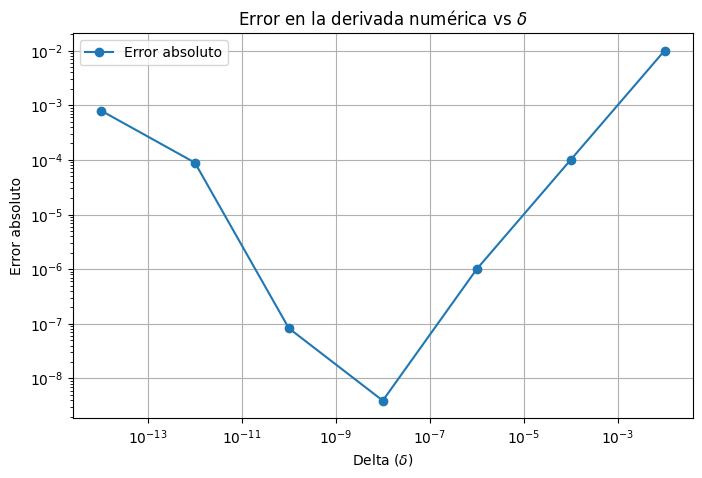

In [17]:
# Definir la función f(x) = x(x - 1)
def f(x):
    return x * (x - 1)

# Derivada analítica: f'(x) = 2x - 1
def derivada_exacta(x):
    return 2 * x - 1

# Derivada por definición: (f(x + delta) - f(x)) / delta
def derivada_aprox(f, x, delta):
    return (f(x + delta) - f(x)) / delta

# Evaluación en x = 1 para varios valores de delta
x = 1
valores_delta = [1e-2, 1e-4, 1e-6, 1e-8, 1e-10, 1e-12, 1e-14]
derivadas_aprox = []
errores = []

print(f"Derivada exacta en x = {x} es: {derivada_exacta(x)}\n")

for delta in valores_delta:
    deriv = derivada_aprox(f, x, delta)
    error = abs(deriv - derivada_exacta(x))
    derivadas_aprox.append(deriv)
    errores.append(error)
    print(f"delta = {delta}, derivada ≈ {deriv}, error = {error}")

# Graficar error vs delta
plt.figure(figsize=(8, 5))
plt.loglog(valores_delta, errores, 'o-', label='Error absoluto')
plt.xlabel("Delta ($\delta$)")
plt.ylabel("Error absoluto")
plt.title("Error en la derivada numérica vs $\delta$")
plt.grid()
plt.legend()
plt.show()

# (Respuesta de la pregunta abajo)

## ¿Por qué los resultados no coinciden exactamente?
Al principio, al reducir delta, la precisión mejora ya que el error más pequeño. Sin embargo, si delta es demasiado pequeño (como 1e-12 o 1e-14), los errores de redondeo del computador hacen que el resultado empeore. Esto quiere decir que hay un punto donde hacer delta más pequeño deja de ayudar y empieza a empeorar la evaluación de los datos.